In [21]:
import pandas as pd
import scipy
from scipy import stats

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Симуляции

Для начала сгенерируем выборку нормальных случайных величин и построим для неё Q-Q plot:

In [82]:
def plot_hist_qq(data, dist="norm", bins=20):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    _ = plt.hist(data, bins=bins, normed=True)
    plt.subplot(122)
    _ = scipy.stats.probplot(data, plot=plt, dist=dist)

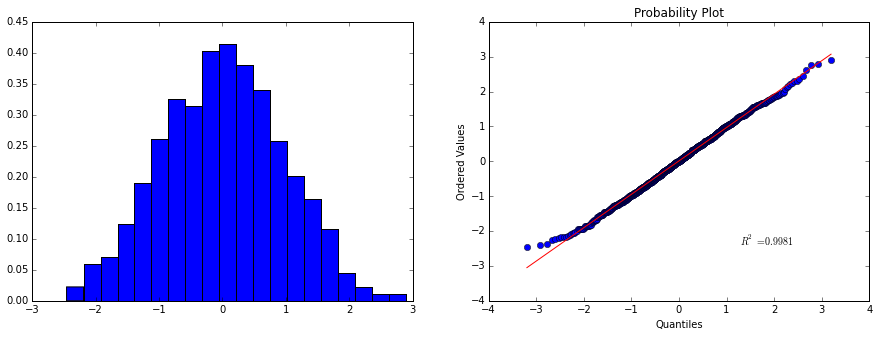

In [83]:
norm_rvs = scipy.stats.norm.rvs(size=1000)
plot_hist_qq(norm_rvs)

Попробуем сделать то же самое, но пусть теперь выборка не из нормального распределения:

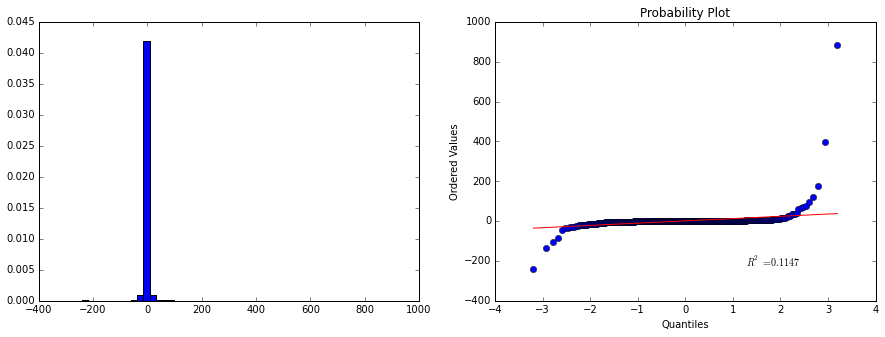

In [84]:
cauchy_rvs = scipy.stats.cauchy.rvs(size=1000)
plot_hist_qq(cauchy_rvs, bins=50)

Как нетрудно заметить, в отличии от предыдущего случая, Q-Q plot не выглядит как прямая. Нарисуем Q-Q plot, считая, что выборка распределена по Коши:

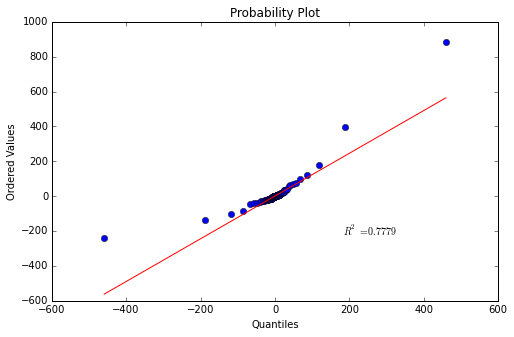

In [85]:
plt.figure(figsize=(8, 5))
_ = scipy.stats.probplot(cauchy_rvs, plot=plt, dist="cauchy")

Здесь тоже нельзя сказать, что график получился прямой. Но это уже проблемы распределения Коши с его тяжелыми хвостами.

# Реальные данные

Теперь посмотрим на Q-Q plot, построенный по реальным данным. В переменных metric1, metric2 и metric3 лежат результаты A/B экспериментов, проводимых Яндексом за последние два года, для трех неназванных метрик. 

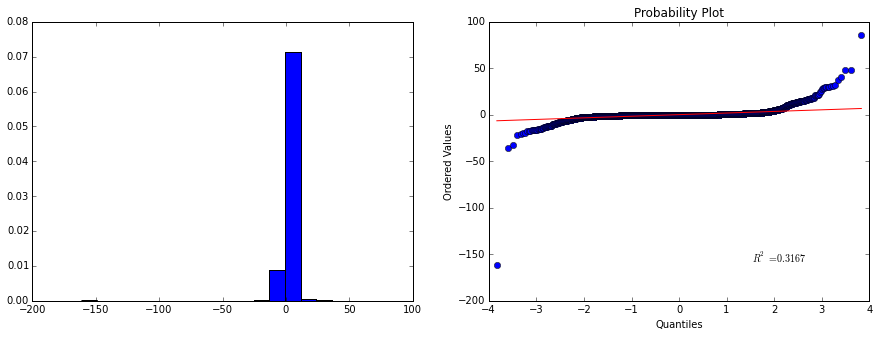

In [86]:
plot_hist_qq(metric1)

Первая метрика почти не похожа на нормальное распределение - хвосты совсем не такие, какими должны быть. Однако в области нуля какое-то аномальное скопление. Рассмотрим его поближе:

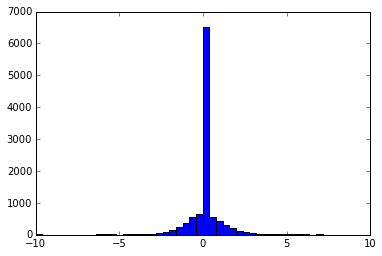

In [88]:
_ = plt.hist(metric1[metric1.abs() < 10], bins=50)

Оказывается, в выборке очень много нулей! Посчитаем, сколько их:

In [89]:
len(metric1), (metric1 == 0.).sum()

(10915, 5861)

Больше половины. Попробуем выкинуть их и построить Q-Q plot без них:

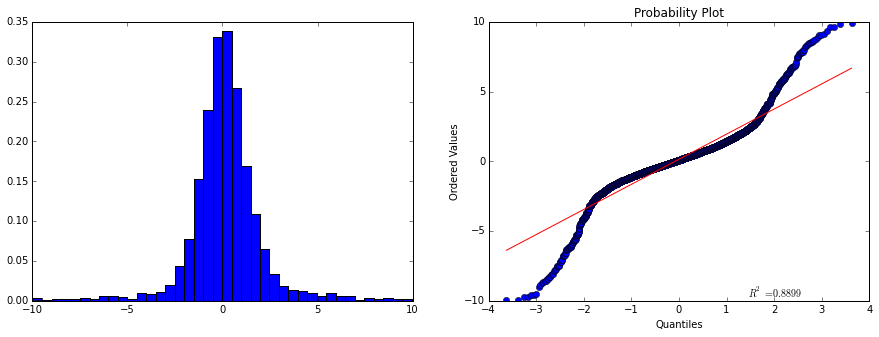

In [99]:
plot_hist_qq(metric1[(metric1 != 0.) & (metric1.abs() < 10)].reset_index(drop=True), bins=40)

С одной стороны, все стало еще хуже. С другой, теперь отчетливо видно, что выборка совсем не похожа на выборку из нормального распределения. Посмотрим на оставшиеся две метрики:

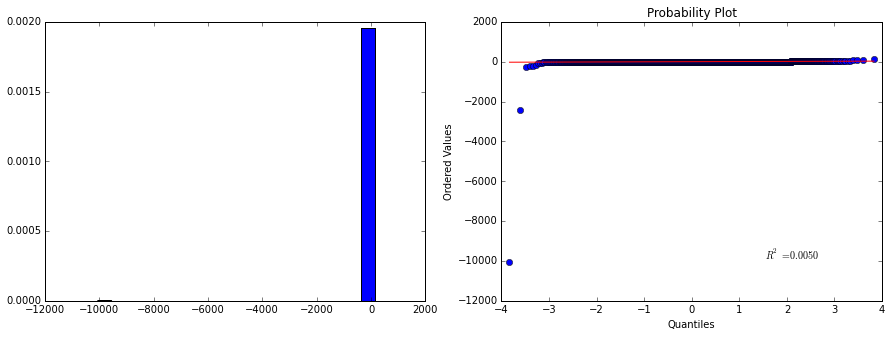

In [101]:
plot_hist_qq(metric2)

На первый взгляд может показаться, что все прекрасно - на Q-Q plot идеальная прямая, за исключением двух выбросов. Но все не так просто: уберем эти выбросы:

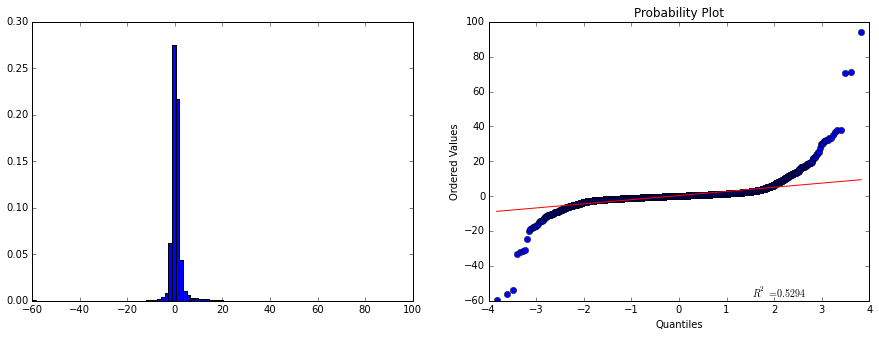

In [104]:
plot_hist_qq(metric2[metric2.abs() < 100], bins=100)

Ситуация аналогична первой метрике. Результаты для третьей:

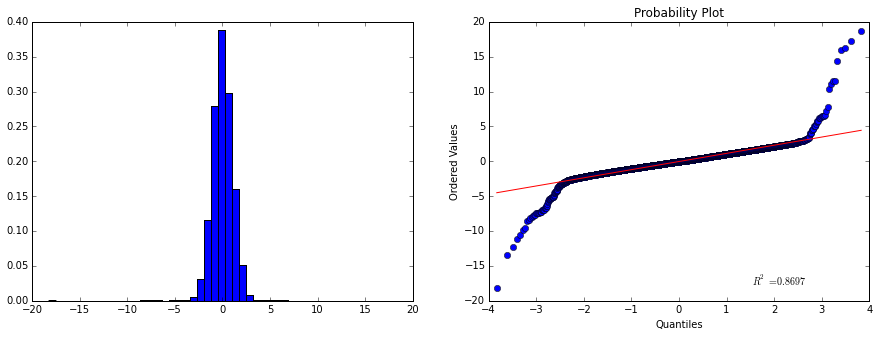

In [110]:
plot_hist_qq(metric3[metric3.abs() < 20], bins=50)

Все равно не похоже на нормальное :) Можно сделать вывод, что результаты А/В экспериментов не распределены нормально

Смеха ради (хвосты все-таки тяжелые получались) попробуем построить Q-Q plot, предполагая выборку распределенной по Коши:

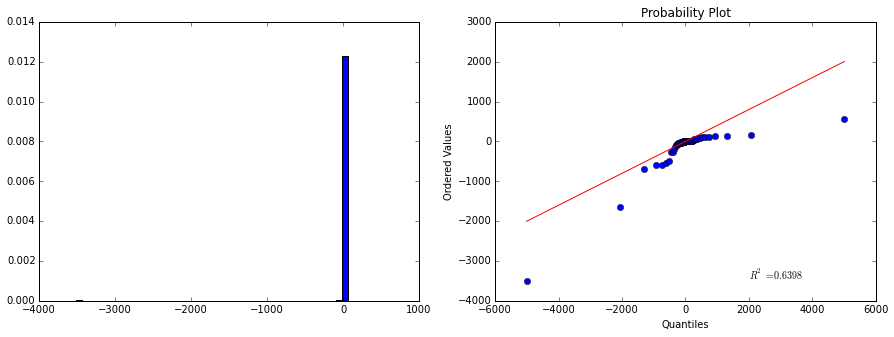

In [112]:
plot_hist_qq(metric3, bins=50, dist="cauchy")

Совсем не похоже